# Linear transformations

In [3]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
print(X.shape)
raw = X[:, None, 2] #take just the third column as a (442, 1) matrix instead of a (442) array.
print(raw.shape )

(442, 10)
(442, 1)


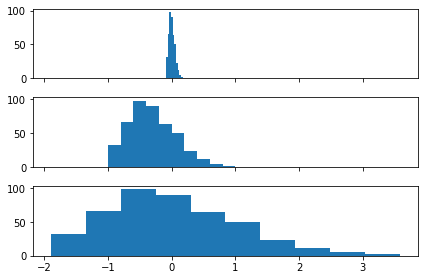

In [10]:
max_raw = max(raw)
min_raw = min(raw)

scaled = (2*raw - max_raw -min_raw)/(max_raw - min_raw)

# normalización Z-score

avg = np.average(raw)
std = np.std(raw)
z_scaled = (raw - avg)/std
mean = np.mean(raw)

fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True)

axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_scaled)
plt.show()

In [16]:
print('std = ', std)
print('avg = ', avg)

std =  0.047565149415453895
avg =  -8.013951493363262e-16


In [18]:
X.shape

(442, 10)

In [25]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [47]:
diab = datasets.load_diabetes(return_X_y = False)
#show type of diab
print(type(diab))

print(diab.keys())
print(diab['data'].shape)
print(diab['DESCR'])

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
(442, 10)
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4   

In [54]:
print(np.unique(X[:,1]))

[-0.04464164  0.05068012]


### Models for training

In [55]:
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [70]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_raw, number = 100)
z_scaled_time = timeit.timeit(train_raw, number = 100)
print('trainning time for raw data : {} '.format(raw_time))
print('trainning time for scaled data : {}'.format(scaled_time))
print('trainning time for z_scaled data : {}'.format(z_scaled_time))

trainning time for raw data : 0.0629975670017302 
trainning time for scaled data : 0.04260814499866683
trainning time for z_scaled data : 0.0369246589980321


# Non-linear transformations

In [72]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [73]:
df = pd.read_csv('cars.csv')

<AxesSubplot:>

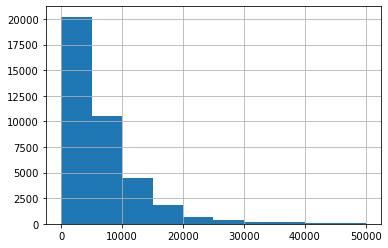

In [78]:
df.price_usd.hist()

<AxesSubplot:>

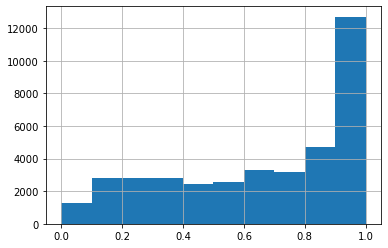

In [82]:
p = 5000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

<AxesSubplot:>

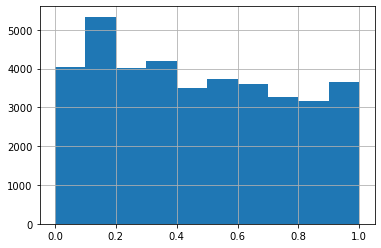

In [85]:
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()